In [1]:
import os
import glob
import pandas as pd
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pkl_dir = '/data/users2/jwardell1/undersampling-project/OULU/pkl-files/'

# Read and concatenate sr1 data
joined_files = os.path.join(pkl_dir, 'sr1_*.pkl')
joined_list = glob.glob(joined_files)
sr1 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr1') for file in joined_list), ignore_index=True)

# Read and concatenate sr2 data
joined_files = os.path.join(pkl_dir, 'sr2_*.pkl')
joined_list = glob.glob(joined_files)
sr2 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr2') for file in joined_list), ignore_index=True)

# Read and concatenate concat data
joined_files = os.path.join(pkl_dir, 'concat_*.pkl')
joined_list = glob.glob(joined_files)
concat = pd.concat((pd.read_pickle(file).assign(sampling_rate='concat') for file in joined_list), ignore_index=True)

# Read and concatenate add data
joined_files = os.path.join(pkl_dir, 'add_*.pkl')
joined_list = glob.glob(joined_files)
add = pd.concat((pd.read_pickle(file).assign(sampling_rate='add') for file in joined_list), ignore_index=True)

# Concatenate all dataframes
all_data = pd.concat([sr1, sr2, concat, add], ignore_index=True)



# Function to split each row into multiple rows based on cross-validation index
def split_row(row):
    new_rows = []
    for cv_ix, auc in enumerate(row['test_scores']):
        new_row = row.copy()
        new_row['auc'] = auc
        new_row['cv_ix'] = cv_ix
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

# Apply the split_row function to each row of the dataframe and concatenate the results
result_df = pd.concat(all_data.apply(split_row, axis=1).tolist(), ignore_index=True)



# Drop the original 'test_scores' column as it's no longer needed
result_df.drop('test_scores', axis=1, inplace=True)



grouped_classifiers = result_df.groupby('classifier')


classifier_dfs = {}
for classifier, group_df in grouped_classifiers:
    classifier_dfs[classifier] = group_df.copy()

mlp_df = classifier_dfs['Multilayer Perceptron']
lr_df = classifier_dfs['Logistic Regression']
svm_df = classifier_dfs['SVM']
nb_df = classifier_dfs['Naive Bayes']


dfs = [mlp_df, lr_df, svm_df, nb_df]
classifiers = ['Multilayer Perceptron', 'Logistic Regression', 'SVM', 'Naive Bayes']
sampling_rates = ['sr1', 'sr2', 'add', 'concat']
#sampling_rates = [ 'sr2', 'add', 'concat']
hue_order = sampling_rates
palette = { item: plt.cm.tab20(i) for i, item in enumerate(sampling_rates)}

# Combine all dataframes into one dataframe for plotting
combined_df = pd.concat(dfs)
snr_levels = [0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0]


In [3]:
sr1

,graph_no,nstd,burnin,noise_no,snr,classifier,test_scores,target,predictions,test_proba,sampling_rate
0,0,1.0,100,4,0.5,Logistic Regression,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",0 0.039665 1 0.961839 2 0.03...,sr1
1,0,1.0,100,4,0.5,Multilayer Perceptron,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",0 1.121879e-07 1 9.787361e-01 2 ...,sr1
2,0,1.0,100,4,0.5,Naive Bayes,0 0.71875 1 1.0 2 1.0 3 ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.000000e+00 1 0.000000e+00 2 ...,sr1
3,0,1.0,100,4,0.5,SVM,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 1.387221e-07 1 1.297164e-05 2 ...,sr1
4,1,1.0,100,4,0.9,Logistic Regression,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",0 0.049273 1 0.999988 2 0.03...,sr1
...,...,...,...,...,...,...,...,...,...,...,...
295,0,1.0,100,4,2.4,SVM,0 0.401094 1 0.446563 2 0.381875 3 ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.491806 1 0.491805 2 0.49...,sr1
296,2,1.0,100,4,2.4,Logistic Regression,0 0.680781 1 0.673125 2 0.633281 3 ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.550752 1 0.559392 2 0.54...,sr1
297,2,1.0,100,4,2.4,Multilayer Perceptron,0 0.637031 1 0.5 2 0.605 3 ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",0 0.811428 1 0.969604 2 0.47...,sr1
298,2,1.0,100,4,2.4,Naive Bayes,0 0.580156 1 0.657656 2 0.6125 3 ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 2.466371e-13 1 4.480433e-13 2 ...,sr1


In [3]:
snr_levels = [0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0]

lower_limit = 1.5
combined_df[combined_df['snr'] >= lower_limit].groupby(by="sampling_rate").agg(median_total_auc=("auc", "median"))



,median_total_auc
sampling_rate,
add,0.662715
concat,0.627852
sr1,0.629453
sr2,0.590000


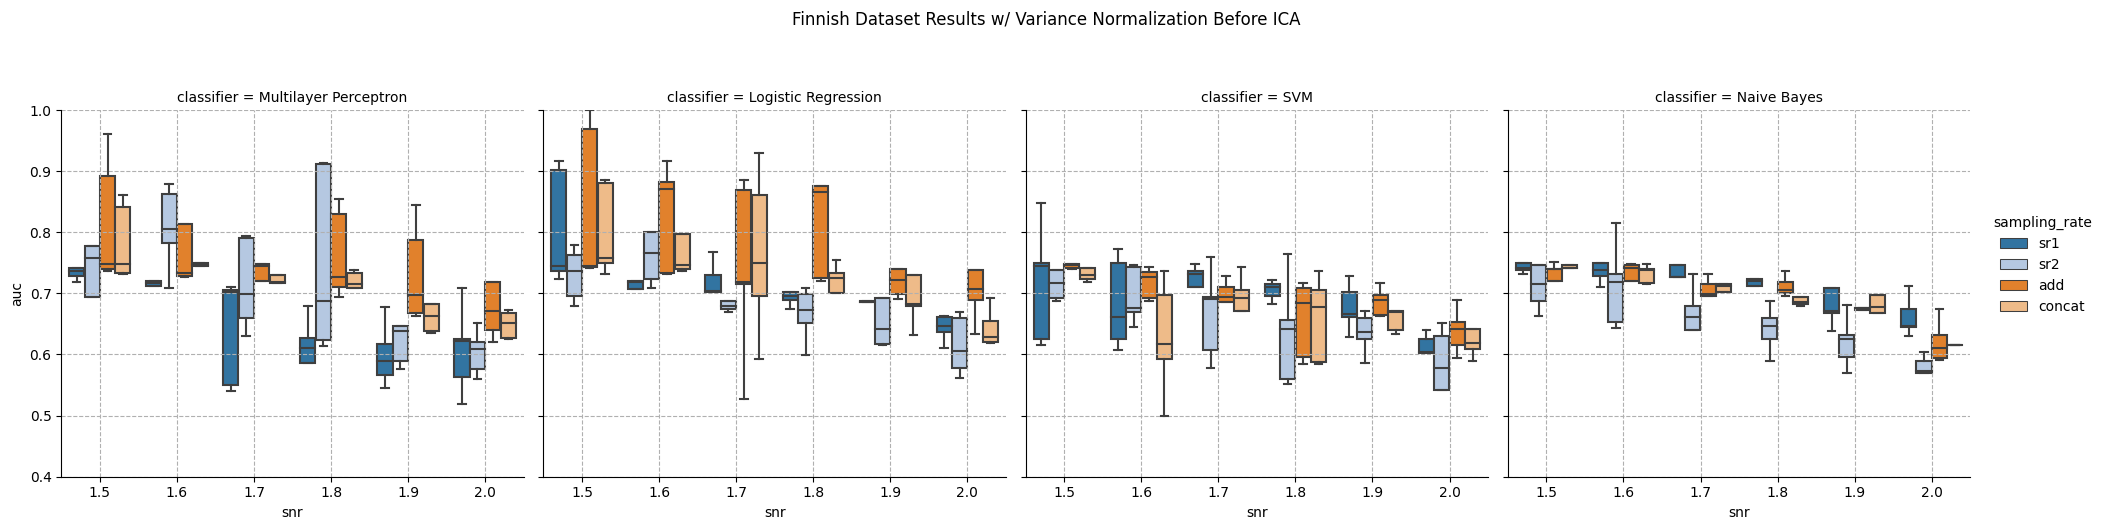

In [4]:
%matplotlib inline
# Combine all dataframes into one dataframe for plotting
combined_df = pd.concat(dfs)
#snr_levels = [0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0]
snr_levels = [ 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0]

yticks_start = 0.4
yticks_step = 0.1
ax = sns.catplot(
    x="snr", 
    order=snr_levels,
    y="auc",
    hue="sampling_rate",
    hue_order=hue_order,
    col="classifier",
    data=combined_df,
    kind="box",
    palette=palette,
    showfliers=False, 
)


ax.set(ylim=(yticks_start, 1), yticks=[i for i in np.arange(yticks_start, 1 + yticks_step, yticks_step)])

ax.fig.suptitle("Finnish Dataset Results w/ Variance Normalization Before ICA", y=1.05)

plt.subplots_adjust(top=0.85)
for axes in ax.axes.flat:
    axes.grid(True, which='both', axis='both', linestyle='--')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: t-test paired samples, P_val:1.851e-02 t=-3.837e+00
2.1_sr2 vs. 2.1_add: t-test paired samples, P_val:2.014e-02 t=-3.739e+00
2.2_sr2 vs. 2.2_add: t-test paired samples, P_val:7.393e-02 t=-2.405e+00
2.3_sr2 vs. 2.3_add: t-test paired samples, P_val:4.450e-02 t=-2.891e+00
2.4_sr2 vs. 2.4_add: t-test paired samples, P_val:1.968e-03 t=-7.204e+00
2.5_sr2 vs. 2.5_add: t-test paired samples, P_val:1.906e-01 t=-1.574e+00
1.9_sr2 vs. 1.9_add: t-test paired samples, P_val:1.106e-01 t=-2.043e+00
1.5_sr2 vs. 1.5_add: t-test paired samples, P_val:5.340e-01 t=-6.796e-01
1.6_sr2 vs. 1.6_add: t-test paired samples, P_val:8.124e-01 t=2.534e-01
1.7_sr2 vs. 1.7_add: t-test paired samples, P_val:6.986e-01 t=-4.163e-01
1.8_sr2 vs. 1.8_add: t-test paired samples, P_val:8.529e-01 t=-1.977e-01
1.9_sr

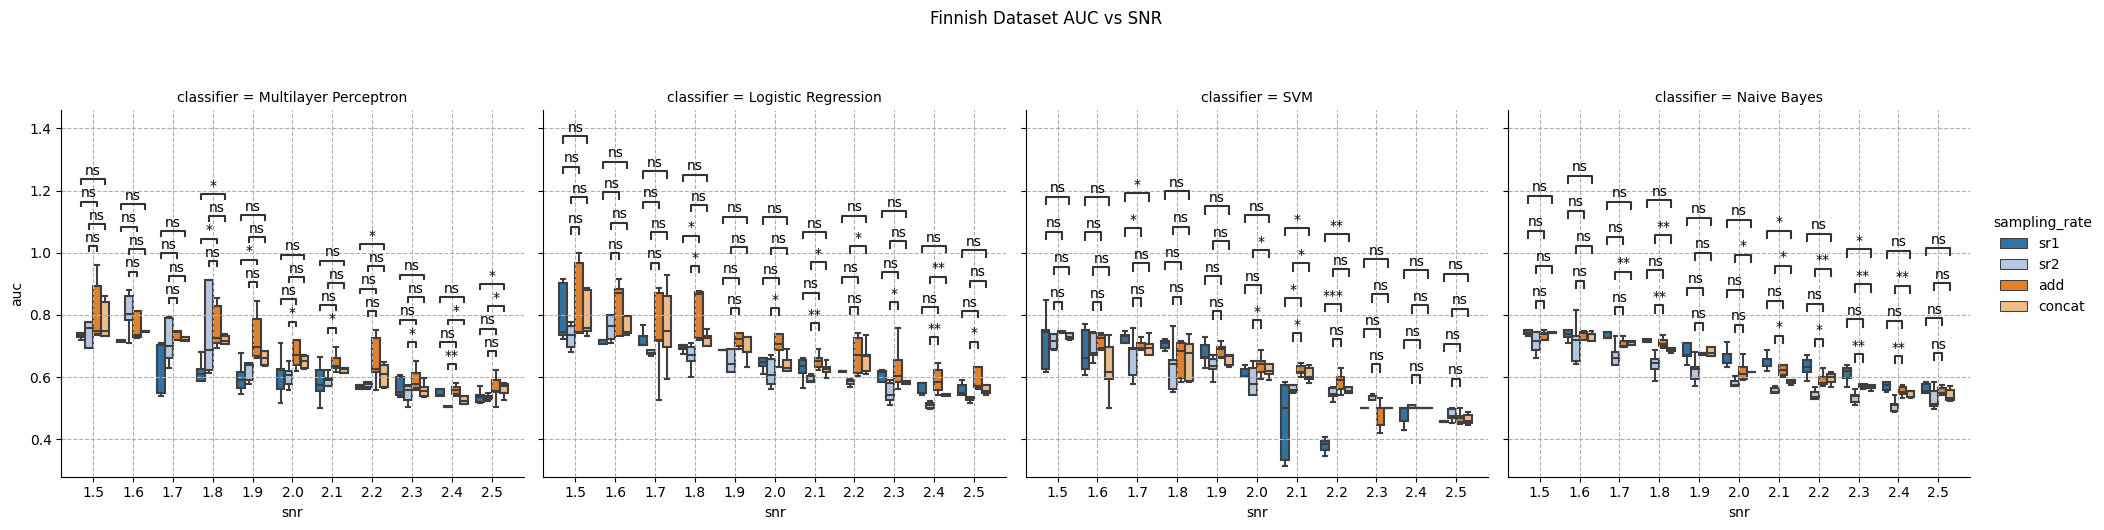

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from statannotations.Annotator import Annotator

# Define your variables
x = "snr"
y = "auc"
hue = "sampling_rate"
hue_order = ['sr1', 'sr2', 'add', 'concat']
snr_levels = [1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
order = snr_levels

# Define a custom color palette
palette = {item: plt.cm.tab20(i) for i, item in enumerate(hue_order)}

# List of classifiers
classifiers = combined_df['classifier'].unique()

# Create the FacetGrid
g = sns.catplot(
    x=x,
    y=y,
    hue=hue,
    hue_order=hue_order,
    col="classifier",
    data=combined_df,
    kind="box",
    palette=palette,
    showfliers=False,
    order=order,
)

# Excluded pairs
excluded_pairs = [{'sr1', 'sr2'}, {'add', 'concat'}]

# Iterate over each axis in the FacetGrid
for ax, classifier in zip(g.axes.flat, classifiers):
    # Filter the data for the current classifier
    data_filtered = combined_df[combined_df['classifier'] == classifier]
    
    # Generate pairs for comparisons specific to the filtered data
    pairs = []
    for snr_level in order:
        for pair in combinations(hue_order, 2):
            if not set(pair) in excluded_pairs:  # Exclude specific pairs
                pairs.append(((snr_level, pair[0]), (snr_level, pair[1])))

    # Annotate the plot
    annotator = Annotator(ax, pairs, data=data_filtered, x=x, y=y, hue=hue, order=order, hue_order=hue_order)
    annotator.configure(test='t-test_paired', verbose=2)
    annotator.apply_and_annotate()

# Add a super title
g.fig.suptitle("Finnish Dataset AUC vs SNR", y=1.05)

# Adjust the layout
plt.subplots_adjust(top=0.85)

# Add grid
for ax in g.axes.flat:
    ax.grid(True, which='both', axis='both', linestyle='--')

# Save the combined plot
plt.savefig('oulu_hue_layout_combined.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


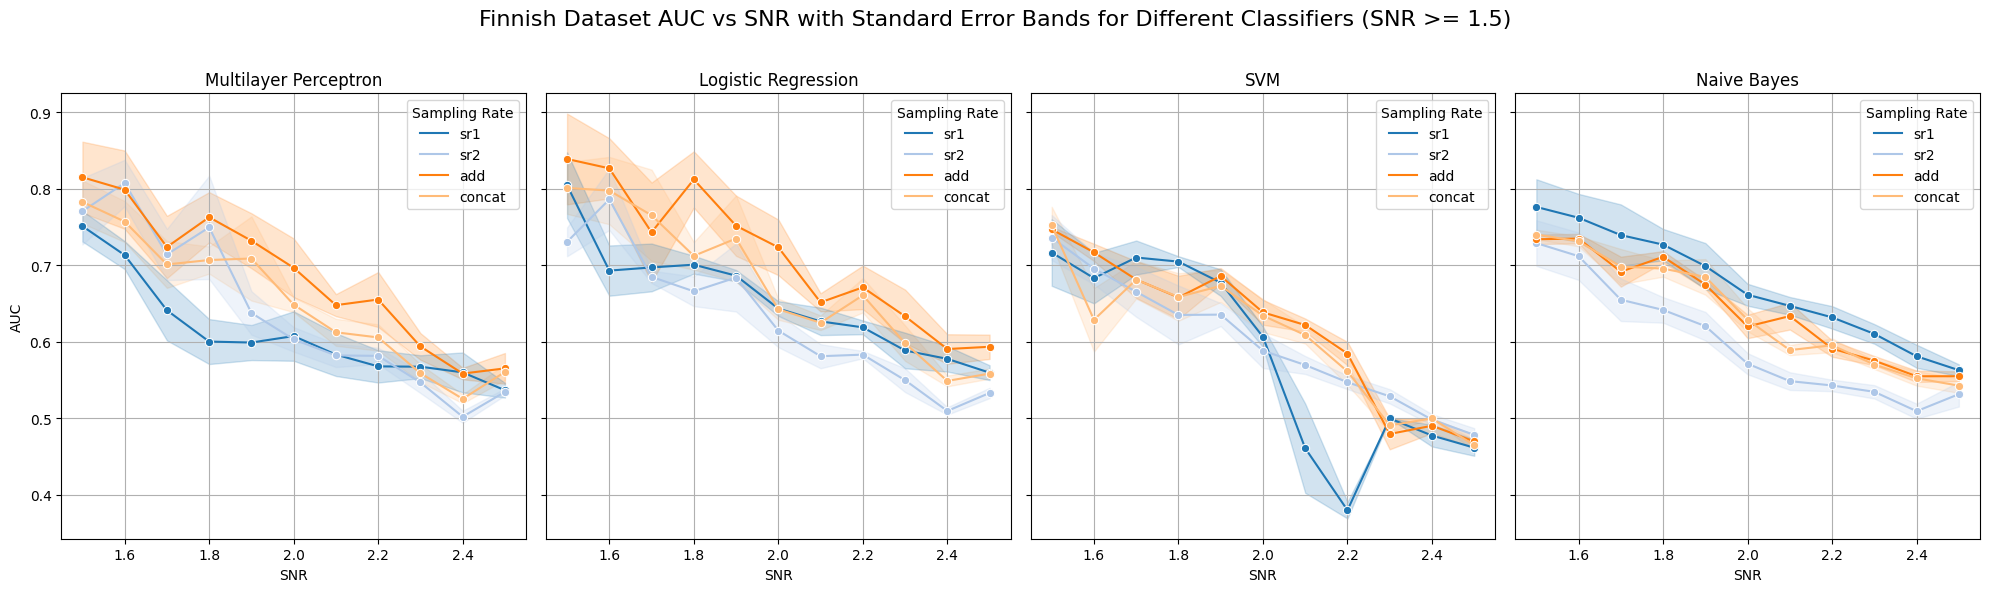

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your data is already in these DataFrames
classifier_dfs = {
    'Multilayer Perceptron': mlp_df,
    'Logistic Regression': lr_df,
    'SVM': svm_df,
    'Naive Bayes': nb_df
}

# Define your variables
x = "snr"
y = "auc"
hue = "sampling_rate"
hue_order = ['sr1', 'sr2', 'add', 'concat']
snr_levels = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
order = snr_levels

# Define a custom color palette
palette = {item: plt.cm.tab20(i) for i, item in enumerate(hue_order)}

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Iterate over each classifier DataFrame and plot
for ax, (classifier_name, df) in zip(axes, classifier_dfs.items()):
    # Filter data where SNR is greater than or equal to 1.5
    df_filtered = df[df[x] >= 1.5]
    
    # Calculate mean and standard error
    summary_df = df_filtered.groupby([x, hue]).agg(
        mean_auc=(y, 'mean'),
        std_auc=(y, 'std'),
        count=(y, 'count')
    ).reset_index()
    summary_df['se_auc'] = summary_df['std_auc'] / np.sqrt(summary_df['count'])

    # Plotting
    sns.lineplot(
        data=summary_df,
        x=x,
        y='mean_auc',
        hue=hue,
        hue_order=hue_order,
        palette=palette,
        marker='o',
        ax=ax
    )

    # Add error bands manually
    for key, grp in summary_df.groupby(hue):
        color = palette[key]
        ax.fill_between(grp[x], grp['mean_auc'] - grp['se_auc'], grp['mean_auc'] + grp['se_auc'], color=color, alpha=0.2)

    ax.set_title(f'{classifier_name}')
    ax.set_xlabel('SNR')
    if ax == axes[0]:
        ax.set_ylabel('AUC')
    ax.legend(title='Sampling Rate')
    ax.grid(True)

plt.suptitle('Finnish Dataset AUC vs SNR with Standard Error Bands for Different Classifiers (SNR >= 1.5)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.377e-07 U_stat=1.000e+02
2.1_sr2 vs. 2.1_add: Mann-Whitney-Wilcoxon test two-sided, P_val:4.705e-04 U_stat=2.130e+02
2.2_sr2 vs. 2.2_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.126e-04 U_stat=1.990e+02
2.3_sr2 vs. 2.3_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.958e-05 U_stat=1.670e+02
2.4_sr2 vs. 2.4_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.827e-03 U_stat=1.000e+01
2.5_sr2 vs. 2.5_add: Mann-Whitney-Wilcoxon test two-sided, P_val:7.695e-04 U_stat=2.220e+02
1.7_add vs. 1.7_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:8.836e-02 U_stat=5.655e+02
1.8_sr1 vs. 1.8_sr2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.587e-01 U_stat=4.540e+02
1.8_add vs. 1.8_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:4

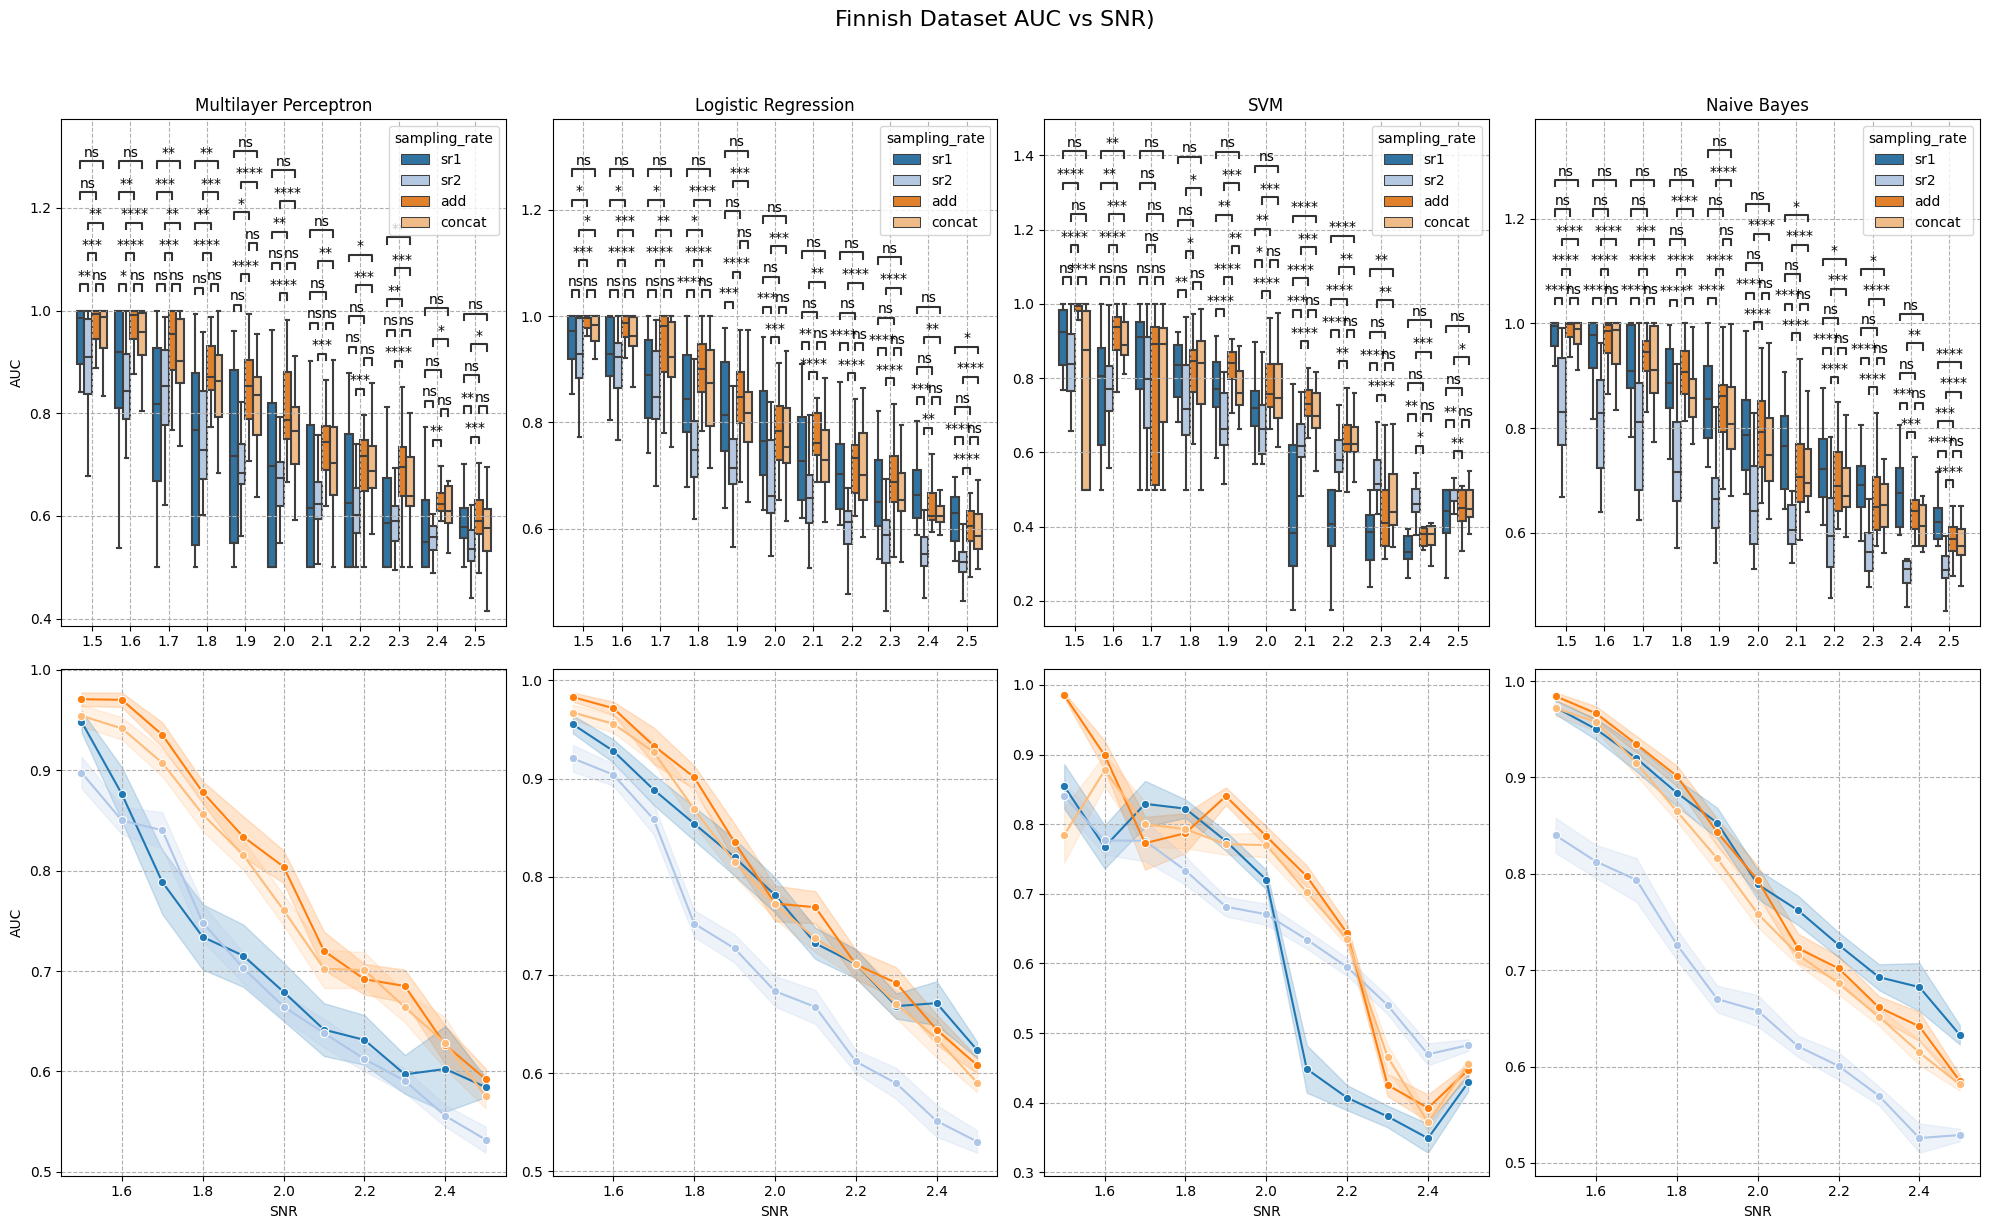

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from statannotations.Annotator import Annotator
import numpy as np
from scipy.stats import wilcoxon


# Define the directory for the current undersampling rate
pkl_dir = f'/data/users2/jwardell1/undersampling-project/OULU/pkl-files'

# Read and concatenate sr1 data
joined_files = os.path.join(pkl_dir, 'sr1_*.pkl')
joined_list = glob.glob(joined_files)
sr1 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr1') for file in joined_list), ignore_index=True)

# Read and concatenate sr2 data
joined_files = os.path.join(pkl_dir, 'sr2_*.pkl')
joined_list = glob.glob(joined_files)
sr2 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr2') for file in joined_list), ignore_index=True)

# Read and concatenate concat data
joined_files = os.path.join(pkl_dir, 'concat_*.pkl')
joined_list = glob.glob(joined_files)
concat = pd.concat((pd.read_pickle(file).assign(sampling_rate='concat') for file in joined_list), ignore_index=True)

# Read and concatenate add data
joined_files = os.path.join(pkl_dir, 'add_*.pkl')
joined_list = glob.glob(joined_files)
add = pd.concat((pd.read_pickle(file).assign(sampling_rate='add') for file in joined_list), ignore_index=True)

# Concatenate all dataframes
all_data = pd.concat([sr1, sr2, concat, add], ignore_index=True)

# Function to split each row into multiple rows based on cross-validation index
def split_row(row):
    new_rows = []
    for cv_ix, auc in enumerate(row['test_scores']):
        new_row = row.copy()
        new_row['auc'] = auc
        new_row['cv_ix'] = cv_ix
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

# Apply the split_row function to each row of the dataframe and concatenate the results
result_df = pd.concat(all_data.apply(split_row, axis=1).tolist(), ignore_index=True)

# Drop the original 'test_scores' column as it's no longer needed
result_df.drop('test_scores', axis=1, inplace=True)

grouped_classifiers = result_df.groupby('classifier')

classifier_dfs = {}
for classifier, group_df in grouped_classifiers:
    classifier_dfs[classifier] = group_df.copy()

mlp_df = classifier_dfs['Multilayer Perceptron']
lr_df = classifier_dfs['Logistic Regression']
svm_df = classifier_dfs['SVM']
nb_df = classifier_dfs['Naive Bayes']

dfs = [mlp_df, lr_df, svm_df, nb_df]
classifiers = ['Multilayer Perceptron', 'Logistic Regression', 'SVM', 'Naive Bayes']
sampling_rates = ['sr1', 'sr2', 'add', 'concat']
hue_order = sampling_rates
palette = {item: plt.cm.tab20(i) for i, item in enumerate(sampling_rates)}

# Combine all dataframes into one dataframe for plotting
combined_df = pd.concat(dfs)
snr_levels = [1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]

lower_limit = 1.5
combined_df = combined_df[combined_df['snr'] >= lower_limit]

# Define your variables
x = "snr"
y = "auc"
hue = "sampling_rate"
order = snr_levels

# Create the figure and the axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), gridspec_kw={'height_ratios': [1, 1]})

for i, classifier in enumerate(classifiers):
    # Filter the data for the current classifier
    data_filtered = combined_df[combined_df['classifier'] == classifier]
    
    # Boxplot
    sns.boxplot(
        x=x, y=y, hue=hue, data=data_filtered, ax=axes[0, i], palette=palette,
        order=order, hue_order=hue_order, showfliers=False
    )

    # Lineplot with error bands
    summary_df = data_filtered.groupby([x, hue]).agg(
        mean_auc=(y, 'mean'),
        std_auc=(y, 'std'),
        count=(y, 'count')
    ).reset_index()
    summary_df['se_auc'] = summary_df['std_auc'] / np.sqrt(summary_df['count'])
    
    sns.lineplot(
        data=summary_df, x=x, y='mean_auc', hue=hue, hue_order=hue_order,
        palette=palette, marker='o', ax=axes[1, i], legend=None
    )
    
    # Add error bands manually
    for key, grp in summary_df.groupby(hue):
        color = palette[key]
        axes[1, i].fill_between(grp[x], grp['mean_auc'] - grp['se_auc'], grp['mean_auc'] + grp['se_auc'], color=color, alpha=0.2)

    axes[0, i].set_title(f'{classifier}')
    axes[0, i].set_xlabel('')
    if i == 0:
        axes[0, i].set_ylabel('AUC')
        axes[1, i].set_ylabel('AUC')
    else:
        axes[0, i].set_ylabel('')
        axes[1, i].set_ylabel('')
    
    axes[1, i].set_xlabel('SNR')
    
    # Generate pairs for comparisons specific to the filtered data
    pairs = []
    for snr_level in order:
        for pair in combinations(hue_order, 2):
            if pair not in [{'sr1', 'sr2'}, {'add', 'concat'}]:  # Exclude specific pairs
                pairs.append(((snr_level, pair[0]), (snr_level, pair[1])))

    # Function to check if Wilcoxon test can be performed
    def can_perform_wilcoxon(group1, group2):
        try:
            stat, p = wilcoxon(group1, group2)
            return True
        except ValueError:
            return False

    valid_pairs = []
    for pair in pairs:
        snr_level = pair[0][0]
        group1 = data_filtered[(data_filtered[x] == snr_level) & (data_filtered[hue] == pair[0][1])][y]
        group2 = data_filtered[(data_filtered[x] == snr_level) & (data_filtered[hue] == pair[1][1])][y]
        if can_perform_wilcoxon(group1, group2):
            valid_pairs.append(pair)

    # Annotate the plot
    annotator = Annotator(axes[0, i], valid_pairs, data=data_filtered, x=x, y=y, hue=hue, order=order, hue_order=hue_order)
    annotator.configure(test='Mann-Whitney', verbose=2)
    annotator.apply_and_annotate()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Add a super title
fig.suptitle(f"Finnish Dataset AUC vs SNR)", fontsize=16, y=1.02)

# Add grid
for ax_row in axes:
    for ax in ax_row:
        ax.grid(True, which='both', axis='both', linestyle='--')

# Save the combined plot
plt.savefig(f'oulu_hue_layout_combined.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.377e-07 U_stat=1.000e+02
2.1_sr2 vs. 2.1_add: Mann-Whitney-Wilcoxon test two-sided, P_val:4.705e-04 U_stat=2.130e+02
2.2_sr2 vs. 2.2_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.126e-04 U_stat=1.990e+02
2.3_sr2 vs. 2.3_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.958e-05 U_stat=1.670e+02
2.4_sr2 vs. 2.4_add: Mann-Whitney-Wilcoxon test two-sided, P_val:1.172e-04 U_stat=1.890e+02
2.5_sr2 vs. 2.5_add: Mann-Whitney-Wilcoxon test two-sided, P_val:7.695e-04 U_stat=2.220e+02
1.7_add vs. 1.7_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:8.836e-02 U_stat=5.655e+02
1.8_sr1 vs. 1.8_sr2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.587e-01 U_stat=4.540e+02
1.8_add vs. 1.8_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:4

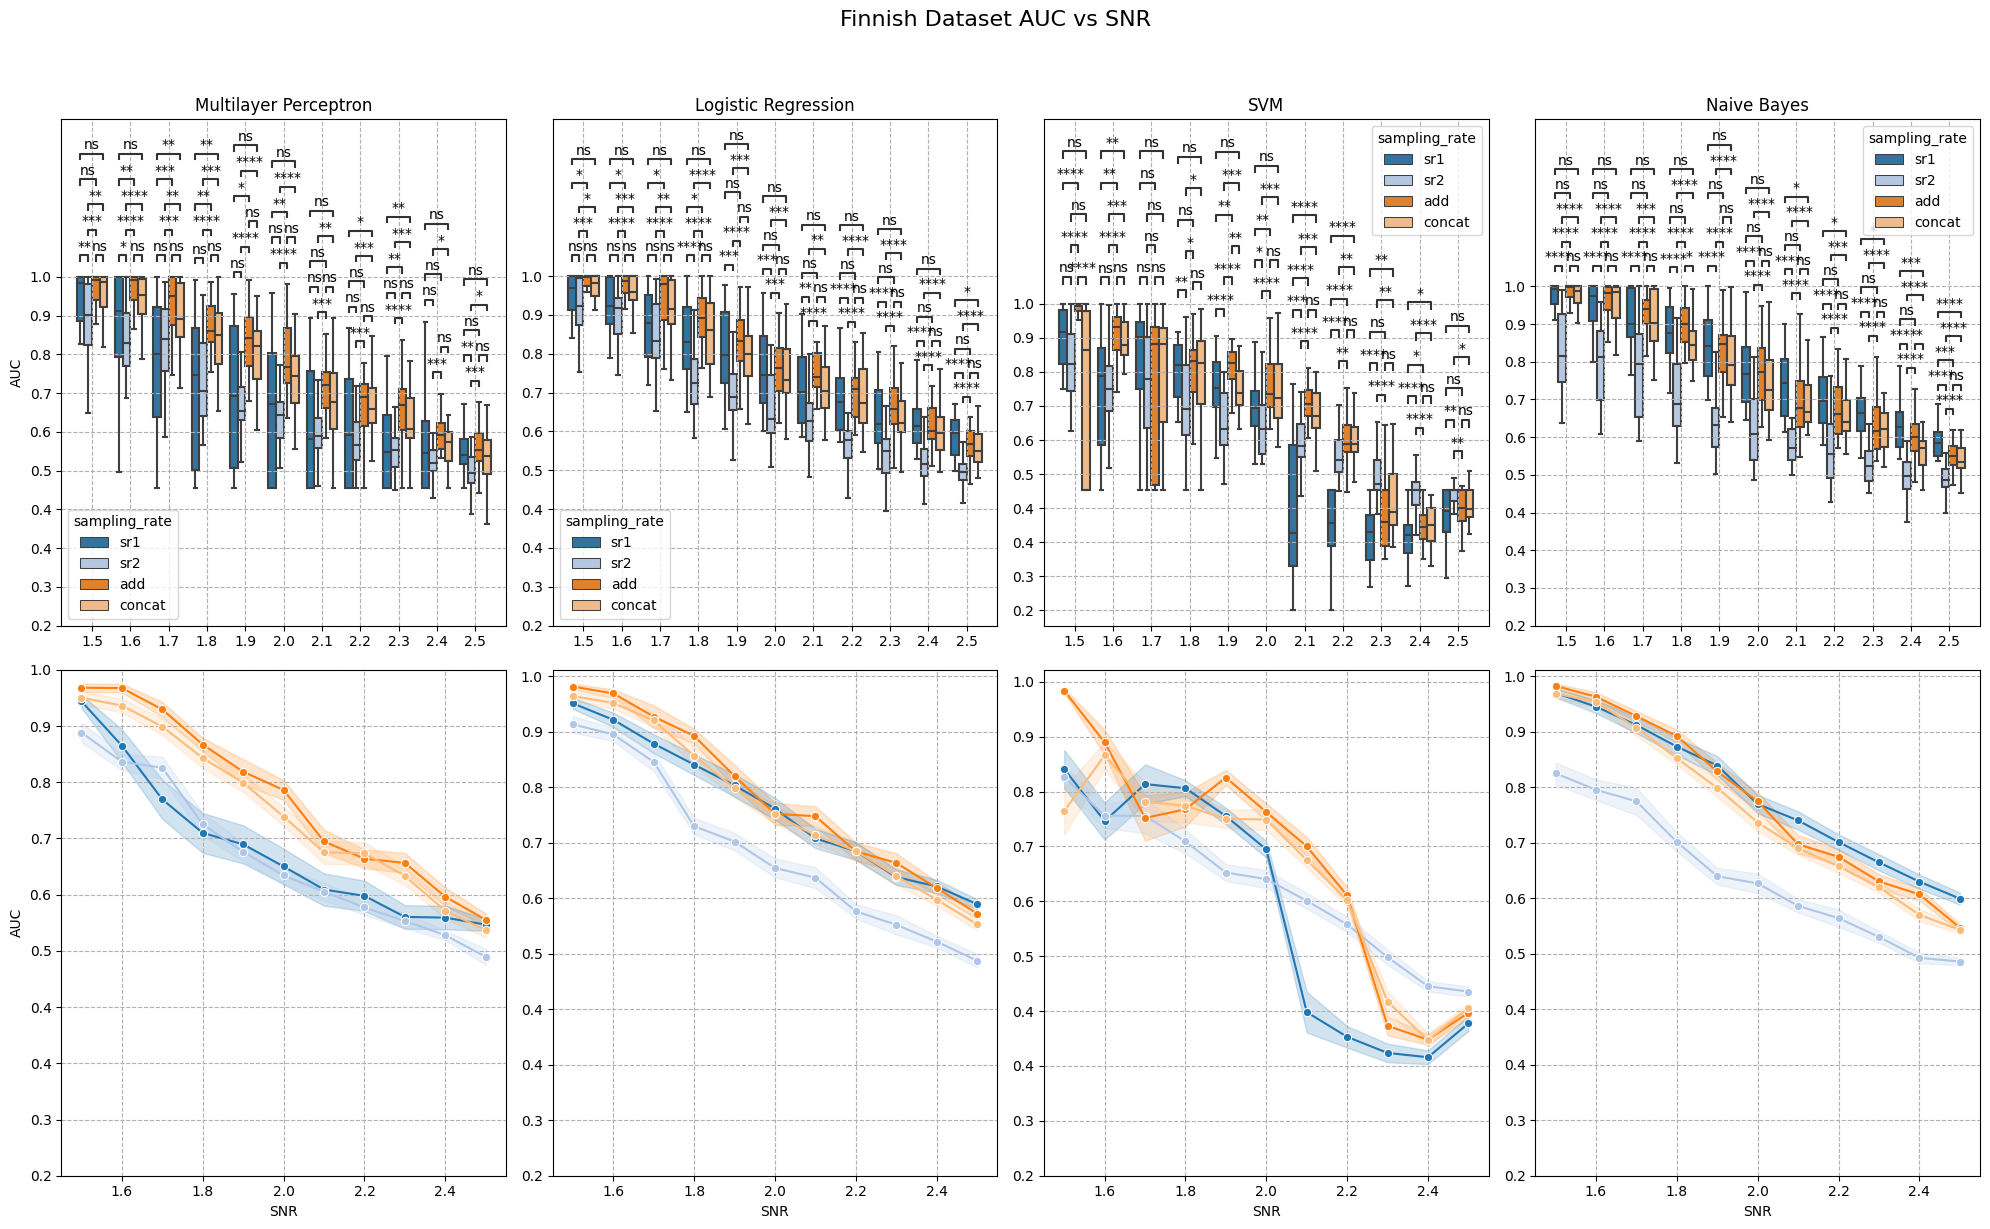

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from statannotations.Annotator import Annotator
import numpy as np
from scipy.stats import wilcoxon

# Define the directory for the current undersampling rate
pkl_dir = f'/data/users2/jwardell1/undersampling-project/OULU/pkl-files'

# Read and concatenate sr1 data
joined_files = os.path.join(pkl_dir, 'sr1_*.pkl')
joined_list = glob.glob(joined_files)
sr1 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr1') for file in joined_list), ignore_index=True)

# Read and concatenate sr2 data
joined_files = os.path.join(pkl_dir, 'sr2_*.pkl')
joined_list = glob.glob(joined_files)
sr2 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr2') for file in joined_list), ignore_index=True)

# Read and concatenate concat data
joined_files = os.path.join(pkl_dir, 'concat_*.pkl')
joined_list = glob.glob(joined_files)
concat = pd.concat((pd.read_pickle(file).assign(sampling_rate='concat') for file in joined_list), ignore_index=True)

# Read and concatenate add data
joined_files = os.path.join(pkl_dir, 'add_*.pkl')
joined_list = glob.glob(joined_files)
add = pd.concat((pd.read_pickle(file).assign(sampling_rate='add') for file in joined_list), ignore_index=True)

# Concatenate all dataframes
all_data = pd.concat([sr1, sr2, concat, add], ignore_index=True)

# Function to split each row into multiple rows based on cross-validation index
def split_row(row):
    new_rows = []
    for cv_ix, auc in enumerate(row['test_scores']):
        new_row = row.copy()
        new_row['auc'] = auc
        new_row['cv_ix'] = cv_ix
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

# Apply the split_row function to each row of the dataframe and concatenate the results
result_df = pd.concat(all_data.apply(split_row, axis=1).tolist(), ignore_index=True)

# Drop the original 'test_scores' column as it's no longer needed
result_df.drop('test_scores', axis=1, inplace=True)

grouped_classifiers = result_df.groupby('classifier')

classifier_dfs = {}
for classifier, group_df in grouped_classifiers:
    classifier_dfs[classifier] = group_df.copy()

mlp_df = classifier_dfs['Multilayer Perceptron']
lr_df = classifier_dfs['Logistic Regression']
svm_df = classifier_dfs['SVM']
nb_df = classifier_dfs['Naive Bayes']

dfs = [mlp_df, lr_df, svm_df, nb_df]
classifiers = ['Multilayer Perceptron', 'Logistic Regression', 'SVM', 'Naive Bayes']
sampling_rates = ['sr1', 'sr2', 'add', 'concat']
hue_order = sampling_rates
palette = {item: plt.cm.tab20(i) for i, item in enumerate(sampling_rates)}

# Combine all dataframes into one dataframe for plotting
combined_df = pd.concat(dfs)
snr_levels = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]

lower_limit = 1.5
combined_df = combined_df[combined_df['snr'] >= lower_limit]

# Define your variables
x = "snr"
y = "auc"
hue = "sampling_rate"
order = snr_levels

# Create the figure and the axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), gridspec_kw={'height_ratios': [1, 1]})

# Collect y-limits for determining the common range
all_y_vals = []

for i, classifier in enumerate(classifiers):
    # Filter the data for the current classifier
    data_filtered = combined_df[combined_df['classifier'] == classifier]
    
    # Boxplot
    sns.boxplot(
        x=x, y=y, hue=hue, data=data_filtered, ax=axes[0, i], palette=palette,
        order=order, hue_order=hue_order, showfliers=False
    )

    # Lineplot with error bands
    summary_df = data_filtered.groupby([x, hue]).agg(
        mean_auc=(y, 'mean'),
        std_auc=(y, 'std'),
        count=(y, 'count')
    ).reset_index()
    summary_df['se_auc'] = summary_df['std_auc'] / np.sqrt(summary_df['count'])
    
    sns.lineplot(
        data=summary_df, x=x, y='mean_auc', hue=hue, hue_order=hue_order,
        palette=palette, marker='o', ax=axes[1, i], legend=None
    )
    
    # Add error bands manually
    for key, grp in summary_df.groupby(hue):
        color = palette[key]
        axes[1, i].fill_between(grp[x], grp['mean_auc'] - grp['se_auc'], grp['mean_auc'] + grp['se_auc'], color=color, alpha=0.2)
    
    # Collect y-values
    all_y_vals.extend(data_filtered[y].values)
    
    axes[0, i].set_title(f'{classifier}')
    axes[0, i].set_xlabel('')
    if i == 0:
        axes[0, i].set_ylabel('AUC')
        axes[1, i].set_ylabel('AUC')
    else:
        axes[0, i].set_ylabel('')
        axes[1, i].set_ylabel('')
    
    axes[1, i].set_xlabel('SNR')
    
    # Generate pairs for comparisons specific to the filtered data
    pairs = []
    for snr_level in order:
        for pair in combinations(hue_order, 2):
            if pair not in [{'sr1', 'sr2'}, {'add', 'concat'}]:  # Exclude specific pairs
                pairs.append(((snr_level, pair[0]), (snr_level, pair[1])))

    # Function to check if Wilcoxon test can be performed
    def can_perform_wilcoxon(group1, group2):
        try:
            stat, p = wilcoxon(group1, group2)
            return True
        except ValueError:
            return False

    valid_pairs = []
    for pair in pairs:
        snr_level = pair[0][0]
        group1 = data_filtered[(data_filtered[x] == snr_level) & (data_filtered[hue] == pair[0][1])][y]
        group2 = data_filtered[(data_filtered[x] == snr_level) & (data_filtered[hue] == pair[1][1])][y]
        if can_perform_wilcoxon(group1, group2):
            valid_pairs.append(pair)

    # Annotate the plot
    annotator = Annotator(axes[0, i], valid_pairs, data=data_filtered, x=x, y=y, hue=hue, order=order, hue_order=hue_order)
    annotator.configure(test='Mann-Whitney', verbose=2)
    annotator.apply_and_annotate()

# Determine common y-tick range
min_y = np.min(all_y_vals)
max_y = np.max(all_y_vals)
common_ticks = np.linspace(min_y, max_y, num=10)

# Set common y-ticks and format them for all subplots
for ax_row in axes:
    for ax in ax_row:
        ax.set_yticks(common_ticks)
        ax.set_yticklabels([f'{tick:.1f}' for tick in common_ticks])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Add a super title
fig.suptitle("Finnish Dataset AUC vs SNR", fontsize=16, y=1.02)

# Add grid
for ax_row in axes:
    for ax in ax_row:
        ax.grid(True, which='both', axis='both', linestyle='--')

# Save the combined plot
plt.savefig('oulu_hue_layout_combined.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [8]:
# Assuming nb_df is already created as per the initial code provided

# Group by SNR level and count the number of AUC points for each level
snr_counts = nb_df.groupby('snr')['auc'].count().reset_index()

# Rename columns for better understanding
snr_counts.columns = ['snr', 'count']

# Display the counts
print(snr_counts)



    snr  count
0   0.5    200
1   0.6    240
2   0.7    200
3   0.8    200
4   0.9    200
5   1.0    160
6   1.1    120
7   1.2    120
8   1.3    120
9   1.4    120
10  1.5    120
11  1.6    120
12  1.7    120
13  1.8    120
14  1.9    120
15  2.0    120
16  2.1    120
17  2.2    120
18  2.3    120
19  2.4    120
20  2.5    120


In [9]:
# Assuming nb_df is already created as per the initial code provided

# Group by SNR level and count the number of AUC points for each level
snr_counts = mlp_df.groupby('snr')['auc'].count().reset_index()

# Rename columns for better understanding
snr_counts.columns = ['snr', 'count']

# Display the counts
print(snr_counts)



    snr  count
0   0.5    200
1   0.6    240
2   0.7    200
3   0.8    200
4   0.9    200
5   1.0    160
6   1.1    120
7   1.2    120
8   1.3    120
9   1.4    120
10  1.5    120
11  1.6    120
12  1.7    120
13  1.8    120
14  1.9    120
15  2.0    120
16  2.1    120
17  2.2    120
18  2.3    120
19  2.4    120
20  2.5    120


In [10]:
# Calculate descriptive statistics for Naive Bayes
nb_stats = nb_df.groupby('snr')['auc'].describe()
print(nb_stats)

# Calculate descriptive statistics for all classifiers for comparison
all_stats = combined_df.groupby(['classifier', 'snr'])['auc'].describe().unstack(level=0)
print(all_stats)



     count      mean       std       min       25%       50%       75%  \
snr                                                                      
0.5  200.0  0.987000  0.061120  0.662500  1.000000  1.000000  1.000000   
0.6  240.0  0.989815  0.050180  0.693750  1.000000  1.000000  1.000000   
0.7  200.0  0.988849  0.049058  0.737500  1.000000  1.000000  1.000000   
0.8  200.0  0.997811  0.011612  0.872969  1.000000  1.000000  1.000000   
0.9  200.0  0.994496  0.025106  0.825000  1.000000  1.000000  1.000000   
1.0  160.0  0.969271  0.098160  0.487812  1.000000  1.000000  1.000000   
1.1  120.0  0.966793  0.089672  0.543750  1.000000  1.000000  1.000000   
1.2  120.0  0.957970  0.101054  0.500000  0.986797  1.000000  1.000000   
1.3  120.0  0.970979  0.073916  0.625000  0.986719  1.000000  1.000000   
1.4  120.0  0.968713  0.062199  0.686094  0.959668  0.998750  1.000000   
1.5  120.0  0.942128  0.082724  0.667344  0.928613  0.976484  1.000000   
1.6  120.0  0.921725  0.089972  0.6400

In [11]:
# Calculate correlation between SNR and AUC scores for Naive Bayes
nb_corr = nb_df[['snr', 'auc']].corr()
print('Naive Bayes Correlation:\n', nb_corr)

# Calculate correlation for all classifiers
for classifier in classifiers:
    classifier_df = classifier_dfs[classifier]
    corr = classifier_df[['snr', 'auc']].corr()
    print(f'{classifier} Correlation:\n', corr)


Naive Bayes Correlation:
          snr      auc
snr  1.00000 -0.80941
auc -0.80941  1.00000
Multilayer Perceptron Correlation:
           snr       auc
snr  1.000000 -0.837765
auc -0.837765  1.000000
Logistic Regression Correlation:
           snr       auc
snr  1.000000 -0.845522
auc -0.845522  1.000000
SVM Correlation:
           snr       auc
snr  1.000000 -0.832874
auc -0.832874  1.000000
Naive Bayes Correlation:
          snr      auc
snr  1.00000 -0.80941
auc -0.80941  1.00000


In [12]:
# Count the number of data points for each SNR level for all classifiers
data_counts = combined_df.groupby(['classifier', 'snr']).size().unstack(level=0)
print(data_counts)


classifier  Logistic Regression  Multilayer Perceptron  Naive Bayes  SVM
snr                                                                     
1.5                         120                    120          120  120
1.6                         120                    120          120  120
1.7                         120                    120          120  120
1.8                         120                    120          120  120
1.9                         120                    120          120  120
2.0                         120                    120          120  120
2.1                         120                    120          120  120
2.2                         120                    120          120  120
2.3                         120                    120          120  120
2.4                         120                    120          120  120
2.5                         120                    120          120  120


In [14]:
# Filter instances where Naive Bayes outperforms others significantly
better_nb = combined_df[(combined_df['classifier'] == 'Naive Bayes') & 
                        (combined_df['auc'] > combined_df.groupby('snr')['auc'].transform('mean'))]

print(better_nb)


       graph_no  nstd  burnin  noise_no  snr   classifier  \
1541          1   1.0     100         4  1.5  Naive Bayes   
1542          1   1.0     100         4  1.5  Naive Bayes   
1543          1   1.0     100         4  1.5  Naive Bayes   
1544          1   1.0     100         4  1.5  Naive Bayes   
1545          1   1.0     100         4  1.5  Naive Bayes   
...         ...   ...     ...       ...  ...          ...   
11985         2   1.0     100         4  2.4  Naive Bayes   
11986         2   1.0     100         4  2.4  Naive Bayes   
11987         2   1.0     100         4  2.4  Naive Bayes   
11988         2   1.0     100         4  2.4  Naive Bayes   
11989         2   1.0     100         4  2.4  Naive Bayes   

                                                  target  \
1541   [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...   
1542   [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...   
1543   [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...   
1544   [0, 1, 0, 1, 0, 1, 0